# Импортирование данных

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap

df=pd.read_csv('/content/drive/MyDrive/Project_chicago/Crime Prediction in Chicago_Dataset (1).csv')

#Анализ датасета до обработки

In [188]:
df.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"


In [170]:
df.shape

(239558, 22)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [172]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.395580e+05,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,1.273144e+07,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
std,7.082019e+05,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267802e+07,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,1.276893e+07,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,1.285704e+07,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.363051e+07,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


Пропуски (NaNs):

In [173]:
nuls = df.isnull().sum()
print(nuls)

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64


Дубликаты:

In [174]:
df.duplicated().sum()

0

In [175]:
df['Primary Type'].value_counts().reset_index()

,Primary Type,count
0,THEFT,54886
1,BATTERY,40946
2,CRIMINAL DAMAGE,27248
3,MOTOR VEHICLE THEFT,21463
4,ASSAULT,20809
5,DECEPTIVE PRACTICE,16854
6,OTHER OFFENSE,14609
7,ROBBERY,8963
8,WEAPONS VIOLATION,8780
9,BURGLARY,7593


# Обработка датасета (работа с пропусками)

Разделение даты на временные промежутки:

In [199]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.dayofweek

Заполнение пропусков модой (для категориальных данных) или средним/медианным значением (для числовых данных):

In [200]:
df['Location Description'].fillna(df['Location Description'].mode()[0],inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(),inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(),inplace=True)
df['Ward'].fillna(df['Ward'].mean(),inplace=True)
df['X Coordinate'].fillna(df['X Coordinate'].mean(),inplace=True)
df['Y Coordinate'].fillna(df['Y Coordinate'].mean(),inplace=True)

<ipython-input-200-3a1c996d860b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location Description'].fillna(df['Location Description'].mode()[0],inplace=True)
<ipython-input-200-3a1c996d860b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

# **Построение ящика с усами для числовых переменных, анализ выбросов и их удаление**

На этих графиках явно видны выбросы для таких переменных, как координаты. Это точки, которые лежат далеко за пределами "усов" ящика. Они не представляют какой-либо важности и их мы попросту можем заменить.

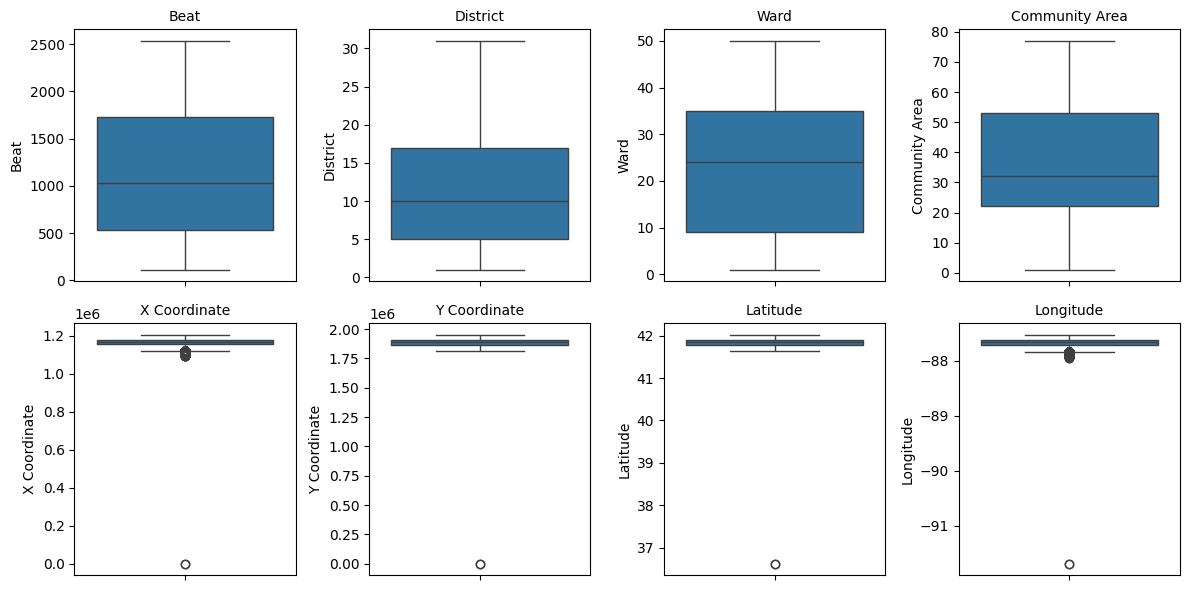

In [178]:
num_cols=df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).select_dtypes(include=['number'])
fig,ax = plt.subplots(2,4,figsize=(12,6))
ax = ax.flatten()

for i,col in enumerate(num_cols):
  sns.boxplot(df,y=col,ax=ax[i],showfliers=True)
  ax[i].set_title(col,fontsize=10)

plt.tight_layout()
plt.show()

In [179]:
df[df['X Coordinate']==0.0]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day of Week
211883,12848210,JF420062,2022-10-02 19:00:00,001XX W CONGRESS PKWY,320,ROBBERY,STRONG ARM - NO WEAPON,CTA TRAIN,False,False,...,0.0,0.0,2022,10/9/2022 15:42,36.619446,-91.686566,"(36.619446395, -91.686565684)",10,2,6
216938,12852880,JF425857,2022-10-07 15:55:00,0000X E CONGRESS PKWY,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,HOTEL / MOTEL,False,False,...,0.0,0.0,2022,10/14/2022 15:41,36.619446,-91.686566,"(36.619446395, -91.686565684)",10,7,4


In [180]:
df['Longitude'].sort_values(ascending=True).head(5)

,Longitude
216938,-91.686566
211883,-91.686566
29225,-87.939733
30212,-87.939733
210998,-87.927882


Как мы видим, всего две строки в нашем датасете отличаются от остальных, с ними и будем работать.

In [181]:
Q1 = df['X Coordinate'].quantile(0.25)
Q3 = df['X Coordinate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['X Coordinate'] = np.where(df['X Coordinate'] < lower_bound, lower_bound, df['X Coordinate'])
df['X Coordinate'] = np.where(df['X Coordinate'] > upper_bound, upper_bound, df['X Coordinate'])

Q1 = df['Y Coordinate'].quantile(0.25)
Q3 = df['Y Coordinate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Y Coordinate'] = np.where(df['Y Coordinate'] < lower_bound, lower_bound, df['Y Coordinate'])
df['Y Coordinate'] = np.where(df['Y Coordinate'] > upper_bound, upper_bound, df['Y Coordinate'])

In [182]:
Q1 = df['Longitude'].quantile(0.25)
Q3 = df['Longitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Longitude'] = np.where(df['Longitude'] < lower_bound, lower_bound, df['Longitude'])
df['Longitude'] = np.where(df['Longitude'] > upper_bound, upper_bound, df['Longitude'])

Q1 = df['Latitude'].quantile(0.25)
Q3 = df['Latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Latitude'] = np.where(df['Latitude'] < lower_bound, lower_bound, df['Latitude'])
df['Latitude'] = np.where(df['Latitude'] > upper_bound, upper_bound, df['Latitude'])

В конечном итоге мы смогли избавиться от выбросов в данных, которые могли помешать нам при дальнейшем анализе.

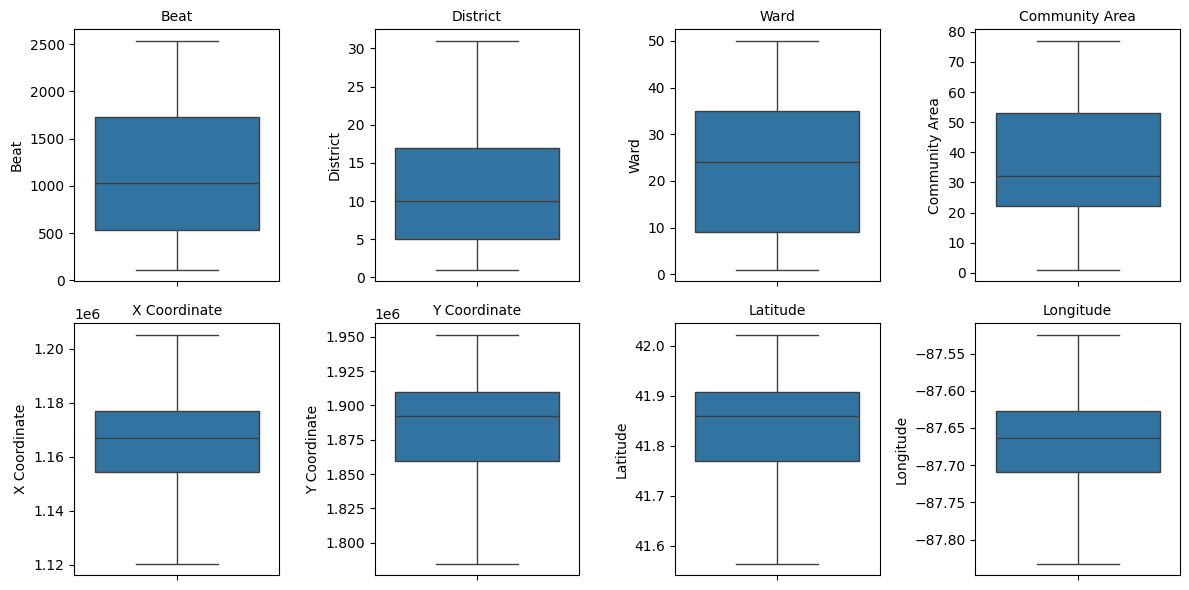

In [183]:
num_cols=df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).select_dtypes(include=['number'])
fig,ax = plt.subplots(2,4,figsize=(12,6))
ax = ax.flatten()

for i,col in enumerate(num_cols):
  sns.boxplot(df,y=col,ax=ax[i])
  ax[i].set_title(col,fontsize=10)

plt.tight_layout()
plt.show()

Теперь, когда мы избавились от выбросов в данных, можно перейти к анализу. Переменные Beat, District, Ward и Community Area, соответствующие конкретным районам местности, указывают на равномерное распределение преступности. Как говорилось ранее видно, что графики X Coordinate и Longitude являются идентичными, такая же свзяь у переменных Y Coordinate и Latitude.

# **Построение матрицы корреляций для числовых переменных**

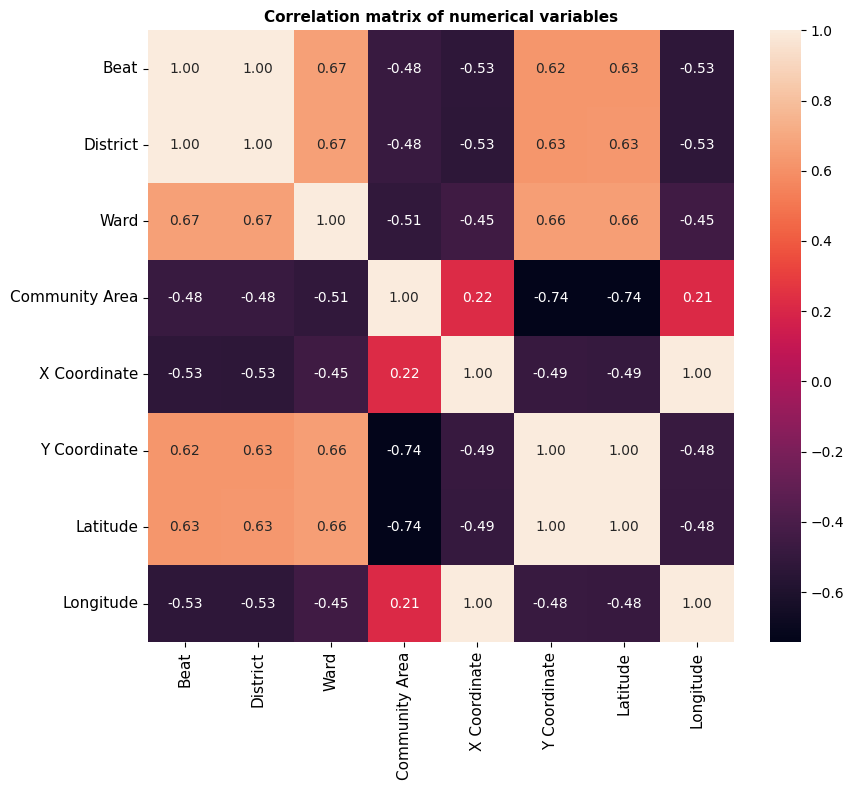

In [128]:
plt.figure(figsize=(9,8))
sns.heatmap(df.drop(columns=['ID', 'Arrest', 'Year', 'Domestic','Date','Day of Week','Month','Day']).corr(numeric_only = True), annot=True, fmt='.2f')
plt.title('Correlation matrix of numerical variables', fontsize=11,fontweight='bold')
plt.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

Переменные Beat, District и Ward  имеют положительную корреляцию между собой (от 0.67 до 1). Почему же это так? Скорее всего преступления определенных типов совершаются в конкретных районах местности, за что и отвечают эти три переменные. Координаты по X и Y полностью коррелируют с широтой и долготой, что правда, ведь по сути они одно и то же. В приниципе, мы можем избавиться от колонок с широтой и долготой, для построения карты будем пользоваться переменными X Coordinate, Y Coordinate.

# EDA

Построение распределения количества преступлений по факту ареста (не арестован / арестован):

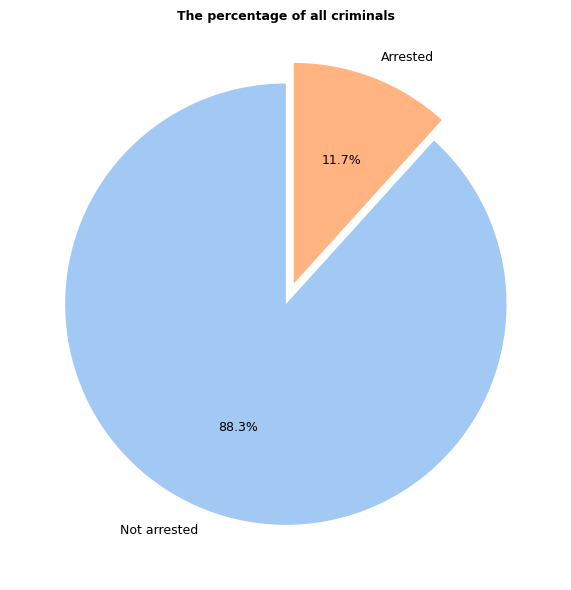

In [102]:
plt.figure(figsize=(12, 6))
plt.pie(df['Arrest'].value_counts(),labels=['Not arrested','Arrested'],colors=sns.color_palette('pastel')[0:2],autopct='%1.1f%%',startangle=90, textprops={'fontsize':9}, explode=[0,0.1])
plt.title('The percentage of all criminals',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

Анализируя данную диаграмму, можно задаться вопросом: почему же всего 11.7% из всех преступников были задержаны, а остальные нет. Вполне вероятно, что это может зависить от категории совершенного преступления, района, в котором подразумевается работа определенных полицейских подразделений, и множества других факторов, которые мы рассмотрим ниже.

График влияния типа преступления на задержание преступника:

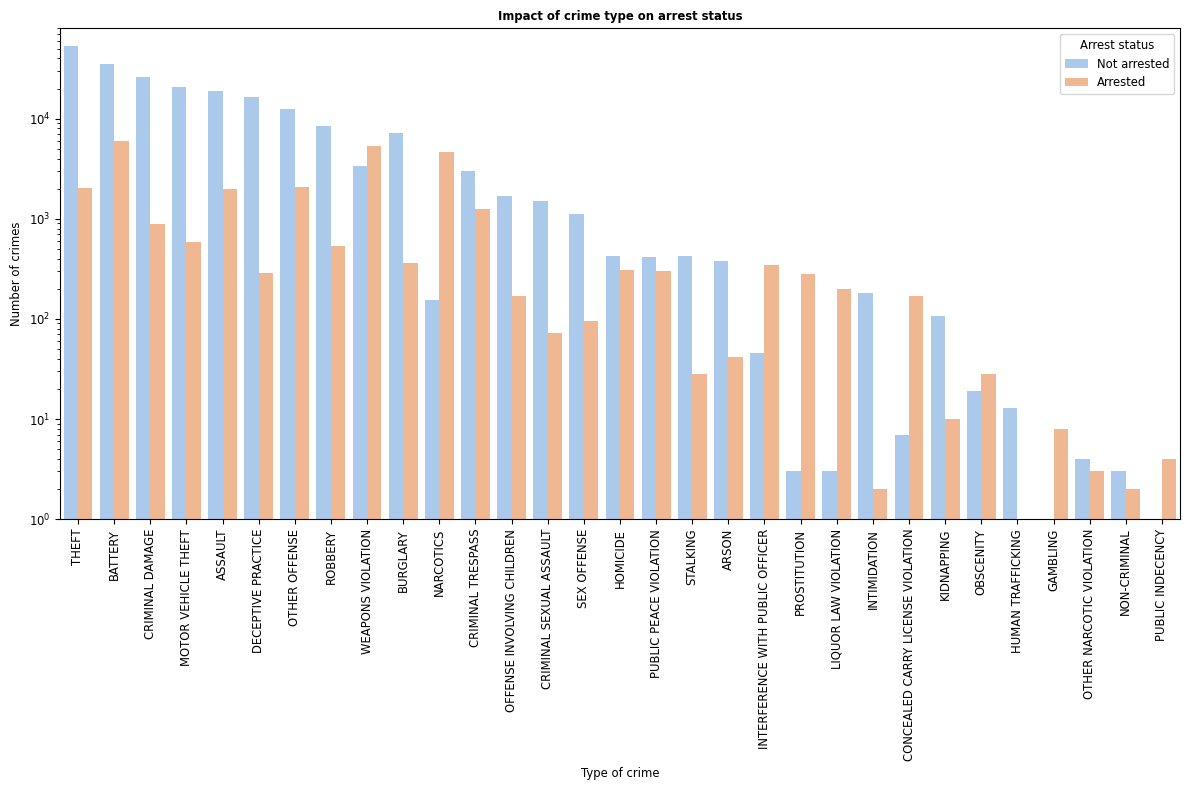

In [126]:
count_data = df.groupby(['Primary Type', 'Arrest']).size().reset_index(name='Count')
sorted_types = count_data.groupby('Primary Type')['Count'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12,8))
sns.countplot(x='Primary Type', hue='Arrest', data=df, palette='pastel', order=sorted_types)
plt.title('Impact of crime type on arrest status', fontsize='small', fontweight='bold')
plt.xlabel('Type of сrime', fontsize='small')
plt.ylabel('Number of сrimes', fontsize='small')
plt.xticks(rotation=90)
plt.tick_params(labelsize='small')
plt.ylim(1,80000)
plt.yscale('log')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()

Для большинства категорий преступления количество не арестованных меньше. Правоохранительные органы могут сосредотачивать свои ресурсы на конкретных типах преступлений в зависимости от приоритетов. Можно заметить что кража (THEFT) является наиболее частым преступлением, но при количество не арестованных является наибольшим. Почему же больше всего арестованных при избеении (BATTERY) или нарушении обращения с оружием (WEAPONS VIOLATION)? Вероятно, полиция уделяет больше внимания преступлениям, свазанным непосредственно с опасностью для граждан.

График распределения совершенных преступлений по месяцам (с фактом ареста):

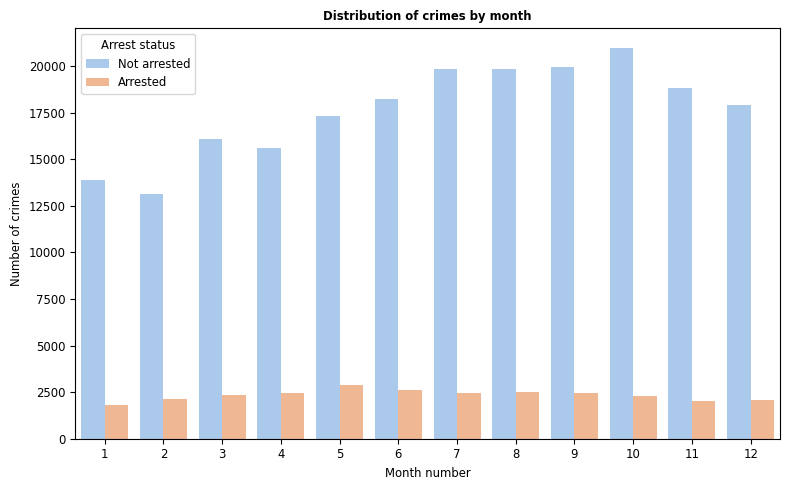

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Month'], hue=df['Arrest'], palette='pastel')
plt.title('Distribution of crimes by month',fontsize='small',fontweight='bold')
plt.xlabel('Month number',fontsize='small')
plt.ylabel('Number of crimes',fontsize='small')
plt.tick_params(labelsize='small')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()

Почему же в январе и феврале наблюдается меньше всего преступлений по сравнению с остальными месяцами? Это связано с тем, что в посленовогоднее время наблюдается меньшая активность людей на улицах, т.е. снижение социальной активности, соответственно меньше преступлений. Также это может быть связано с похолоданием в зимнее время.

График распределения совершенных преступлений по дням недели (с фактом ареста):

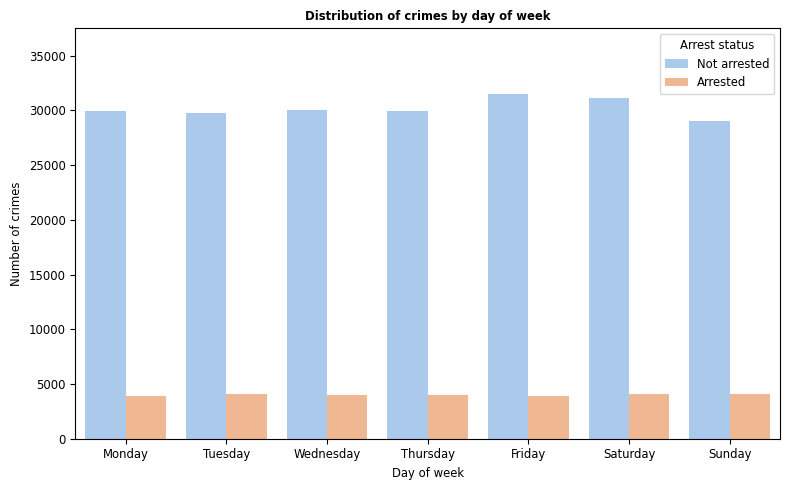

In [111]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Day of Week'], hue=df['Arrest'], palette='pastel')
plt.title('Distribution of crimes by day of week',fontsize='small',fontweight='bold')
plt.xlabel('Day of week',fontsize='small')
plt.ylabel('Number of crimes',fontsize='small')
plt.ylim(0,37500)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks=range(len(days)), labels=days)
plt.tick_params(labelsize='small')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()

Распределение категорий мест, где были совершены преступления (с фактом ареста):

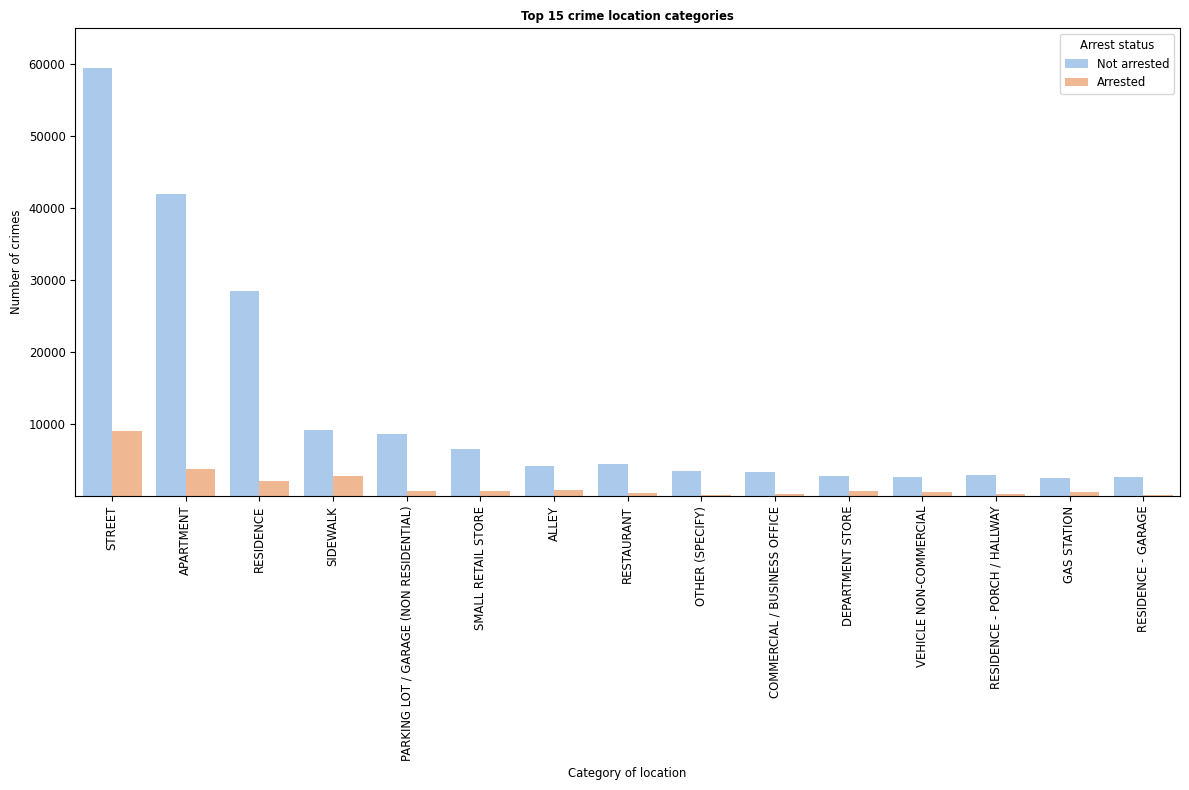

In [124]:
top_loc = df['Location Description'].value_counts().head(15).index
top_lc = df[df['Location Description'].isin(top_loc)]
sorted_counts = top_lc.groupby('Location Description').size().reset_index(name='Count')
sorted_counts = sorted_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,8))
sns.countplot(x='Location Description', hue='Arrest',data=top_lc, palette='pastel',order=sorted_counts['Location Description'])
plt.title('Top 15 crime location categories',fontsize='small',fontweight='bold')
plt.xlabel('Category of location',fontsize='small')
plt.ylabel('Number of crimes',fontsize='small')
plt.xticks(rotation=90)
plt.ylim(1,65000)
plt.tick_params(labelsize='small')

plt.legend(title='Arrest status',title_fontsize='small',labels=['Not arrested','Arrested'],fontsize='small')
plt.tight_layout()
plt.show()